In [2]:
import curvefitting as cf
import pandas as pd
import utilitiesPlotting as up
#import scikit

c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Params: 
[87.85239486  1.00204504 39.15625546 85.42568784]


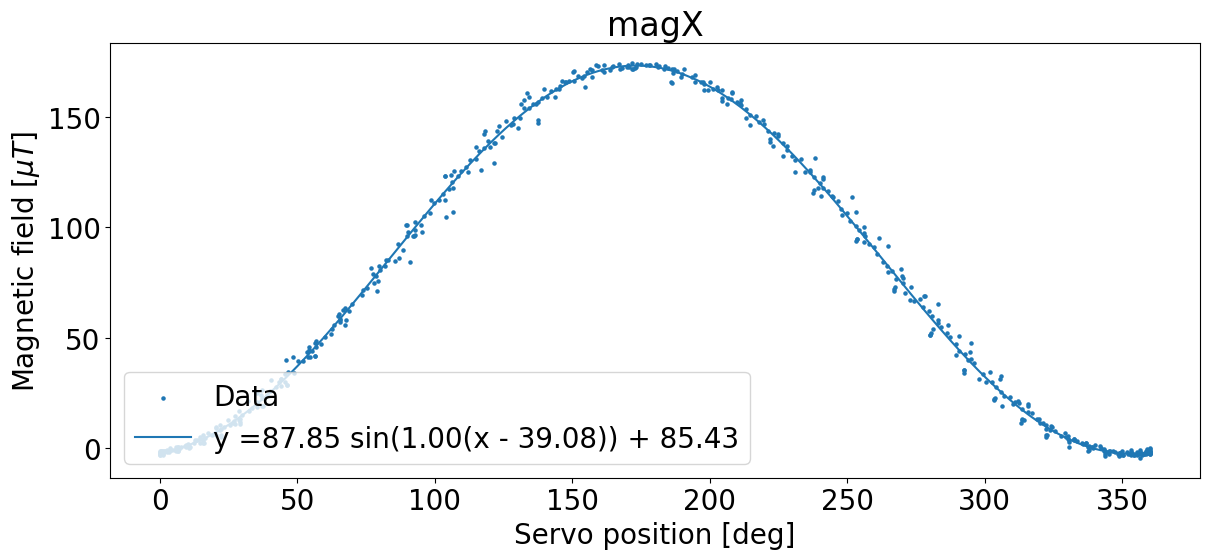

Params: 
[ 88.18427706   1.00039407  -0.122024   -11.40055122]


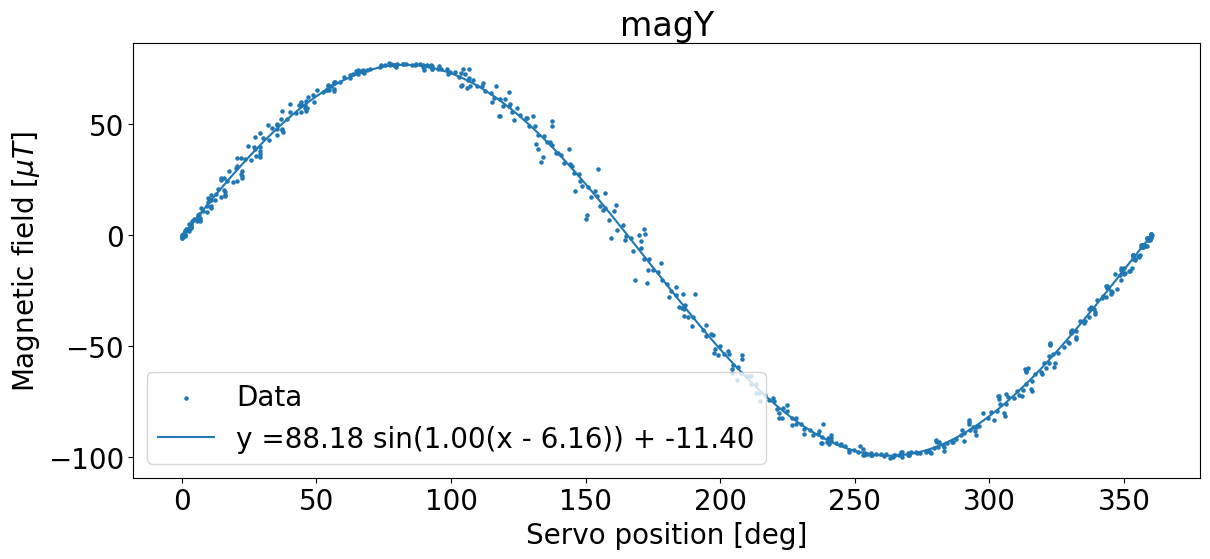

Params: 
[-5.34603585  0.98549957 -4.44845592 -7.49147072]


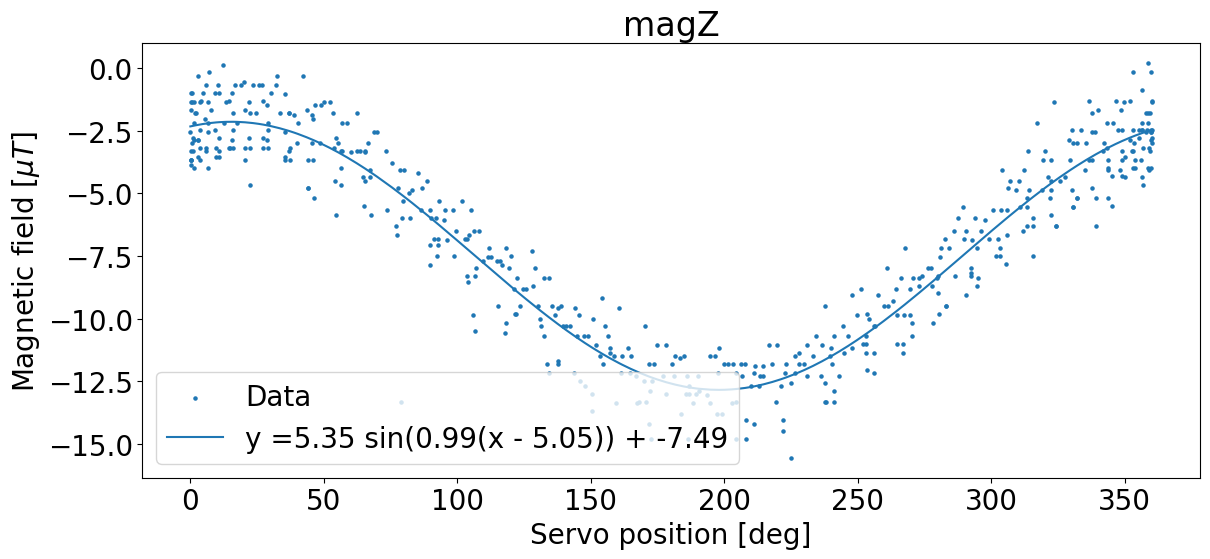

In [7]:
def estimate_sine_params(df_IMU, df_servo, saveFig = False):
    df_mag_servo = df_servo
    
    df_mag_servo['magX'] = df_mag_servo['magX']  - df_IMU['magX'].mean() 
    df_mag_servo['magY'] = df_mag_servo['magY']  - df_IMU['magY'].mean() 
    df_mag_servo['magZ'] = df_mag_servo['magZ']  - df_IMU['magZ'].mean() 
    cf.fitMagnetometerData(df_mag_servo, saveFig = saveFig)


def print_performance_indexes():
    #should print RMSE, R2, etc :)
    return

def convertVel(num):
    bitstring = num.to_bytes(length=5, byteorder='big')
    manipulated = bitstring[-4:]
    return int.from_bytes(manipulated, byteorder='big', signed=True)

def laodTestData(filename, save = False):
    #Loads IMU measurments from csv and removes the obvious outliers (super spikes :)
    df = pd.read_csv(filename, sep = ',', header=0, index_col=False)

    #remove obvious outliers due to measurement noise
    df['time'] = (df['time'] - df['time'].iloc[0])
    df[['magX', 'magY', 'magZ']] = df[['magX', 'magY', 'magZ']][(df[['magX', 'magY', 'magZ']] < 500) & (df[['magX', 'magY', 'magZ']] > -500)].dropna()
    df[['accX', 'accY', 'accZ']] = df[['accX', 'accY', 'accZ']][(df[['accX', 'accY', 'accZ']] < 20) & (df[['accX', 'accY', 'accZ']] > -20)].dropna()

    #remove additional measurement noise
    df['accZ'] = df['accZ'][(df['accZ'] < 20) & (df['accZ'] > 8)].dropna()

    if {'servoPos', 'servoVel', 'servoCur'}.issubset(df.columns):
        df['servoPos'] = df['servoPos'][df['servoPos'] < 5000].dropna()

        for index, val in enumerate(df['servoVel']):
            df['servoVel'].iloc[index] = convertVel(val)

        for index, val in enumerate(df['servoCur']):
            df['servoCur'].iloc[index] = convertVel(val)

        df['servoVel'] = df['servoVel'] * 0.229 #rpm
        df['servoPos'] = df['servoPos'] * 0.088 #deg
        df['servoCur'] = df['servoCur'] * 2.69 #mA
    
    if save:
        df.to_csv('servoTestTranslates.csv')
        

    return df
                    
#MatchAndSaveMagPosData()
df_true_IMU = pd.read_csv("../projectThesisTest1/pureIMUdataOutliersRemoved.csv", sep = ',', header=0, index_col=False) 
df_true_IMU = df_true_IMU.dropna()
df_servo = pd.read_csv("../projectThesisTest1/servoTestTranslatedOutliersRemoved.csv", sep = ',', header=0, index_col=False) 
df_servo = df_servo.dropna()
estimate_sine_params(df_true_IMU, df_servo, saveFig = False)

# With load


        mean    std    skew  kurtosis
magX -12.267  0.621  -0.080    -0.038
magY   8.426  0.524   3.409    47.731
magZ -27.706  0.826  16.009   535.049
accX   0.466  0.011   0.275    -0.119
accY   0.527  0.015   0.296     0.828
accZ   9.790  0.067 -17.966   341.289
gyrX   0.000  0.001   0.065     0.437
gyrY   0.000  0.003  31.971  1349.578
gyrZ  -0.000  0.005  -8.502   701.006


C:\Users\maril\AppData\Local\Temp\ipykernel_35384\2248998682.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoVel'].iloc[index] = convertVel(val)
C:\Users\maril\AppData\Local\Temp\ipykernel_35384\2248998682.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoCur'].iloc[index] = convertVel(val)


Params: 
[90.19133749  0.99833817 39.14049761 88.31330823]


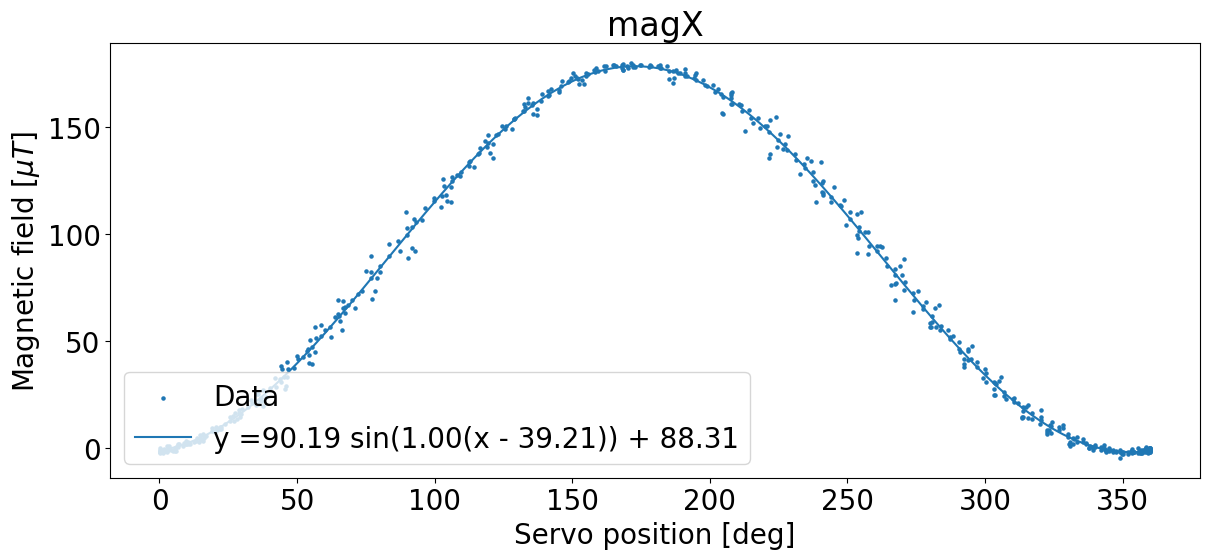

Params: 
[ 91.99138519   1.00101863 -81.80487265 -12.15727747]


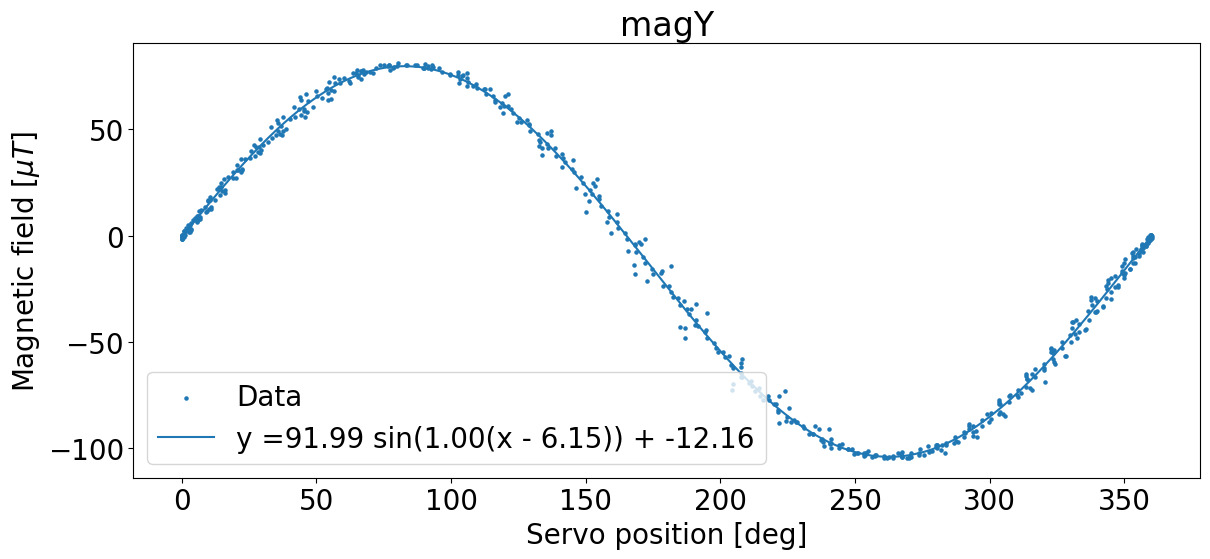

Params: 
[-6.30260689  1.01561421  1.03691769 -6.87954643]


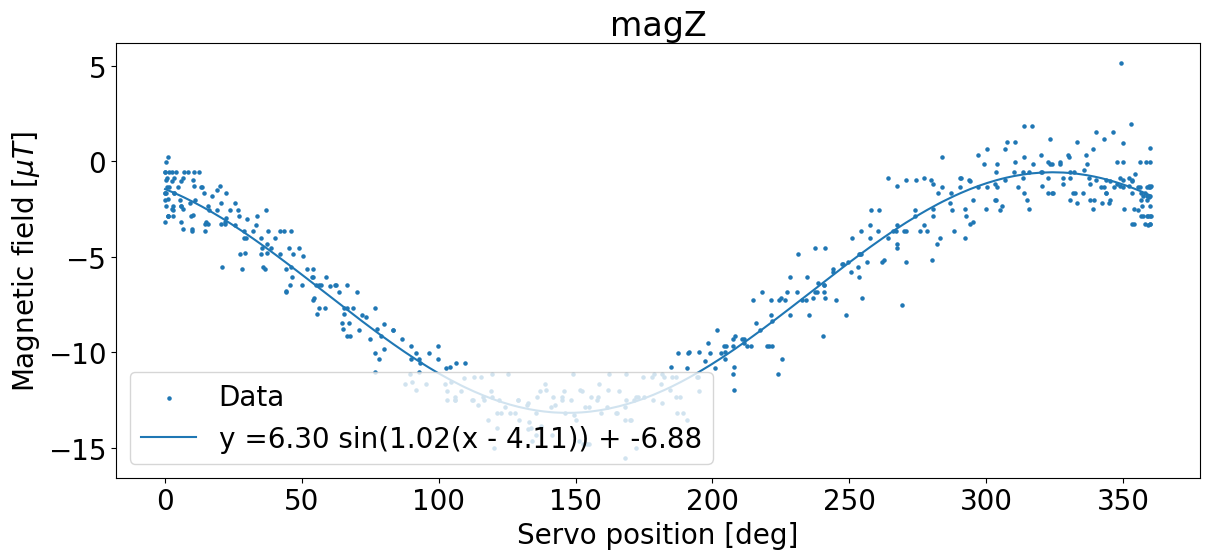

In [6]:
df_true_IMU = up.laodTestData("../projectThesisTest1/newCurrentMeas/wLoad/pureIMUdata2023-05-16 08%3A46%3A23.906719.csv")
df_true_IMU = df_true_IMU.dropna()
df_servo = laodTestData("../projectThesisTest1/newCurrentMeas/wLoad/servoData2023-05-16 08%3A46%3A23.906719.csv") 
df_servo = df_servo.dropna()
estimate_sine_params(df_true_IMU, df_servo, saveFig = False)

# with load 2
Here, servo motor rotated a little bit :) 

In [14]:
df_true_IMU = pd.read_csv("../projectThesisTest1/load2/pureIMUdata2023-05-06 11%3A08%3A40.249831.csv", sep = ',', header=0, index_col=False) 
df_true_IMU = df_true_IMU.dropna()
df_servo = laodTestData("../projectThesisTest1/load2/servoData2023-05-06 11%3A08%3A40.249831.csv") 
df_servo = df_servo.dropna()
estimate_sine_params(df_true_IMU, df_servo, saveFig = True)

C:\Users\maril\AppData\Local\Temp\ipykernel_24132\2248998682.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoVel'].iloc[index] = convertVel(val)
C:\Users\maril\AppData\Local\Temp\ipykernel_24132\2248998682.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoCur'].iloc[index] = convertVel(val)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Params: 
[90.08948699  1.00076158 39.14014477 88.10094035]
Params: 
[ 91.53888548   0.99926449 -81.80870958  -1.88415648]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Params: 
[-6.65494923  1.00338187  1.07404349 -7.81186196]


# With load 3
Here the servo motor rotated less than last

In [15]:
df_true_IMU = pd.read_csv("../projectThesisTest1/load3/pureIMUdata2023-05-06 11%3A16%3A27.759611.csv", sep = ',', header=0, index_col=False) 
df_true_IMU = df_true_IMU.dropna()
df_servo = laodTestData("../projectThesisTest1/load3/servoData2023-05-06 11%3A16%3A27.759611.csv") 
df_servo = df_servo.dropna()
estimate_sine_params(df_true_IMU, df_servo, saveFig = True)

C:\Users\maril\AppData\Local\Temp\ipykernel_24132\2248998682.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoVel'].iloc[index] = convertVel(val)
C:\Users\maril\AppData\Local\Temp\ipykernel_24132\2248998682.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoCur'].iloc[index] = convertVel(val)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Params: 
[90.72838625  0.99952231 39.14046231 88.0919395 ]
Params: 
[ 92.42976      1.001049   -81.80485828 -11.42024304]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Params: 
[-6.55044984  1.01038523  1.05216606 -7.351948  ]
